In [1]:
import cv2
import mediapipe as mp
import numpy as np
from matplotlib import pyplot as plt 

In [2]:
# Initialize MediaPipe Pose and Drawing utilities
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose()

# Open the video file
cap = cv2.VideoCapture('test_pose.mov')

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [3]:
left_heel_tracking_x = []
left_heel_tracking_y = []

points_to_track = [
    'left_heel',
    'left_ankle',
    'left_foot_index',
    'left_knee',
    'left_hip',
]

coordinates_to_track = {}
for point in points_to_track:
    coordinates_to_track[point] = {'x':[], 'y':[]}

In [4]:
## Setup mediapipe instance
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Recolor image to RGB -> mediapipe needs rgb while opencv needs gbr
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
  
    # Make detection
    result = pose.process(image)

    # Draw the pose landmarks on the frame
    if result.pose_landmarks:
        mp_drawing.draw_landmarks(frame, result.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    # Recolor back to BGR
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    # Render detections
    mp_drawing.draw_landmarks(image, result.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                             )               
    
    cv2.imshow('Mediapipe Feed', image)

    for point in coordinates_to_track.keys():
        try:
            x = result.pose_landmarks.landmark[mp_pose.PoseLandmark[point.upper()].value].x
            y = result.pose_landmarks.landmark[mp_pose.PoseLandmark[point.upper()].value].y
            coordinates_to_track[point]['x'].append(x)
            coordinates_to_track[point]['y'].append(y)
        except:
            pass
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)  # otherwise window doesn't close on macbook

-1

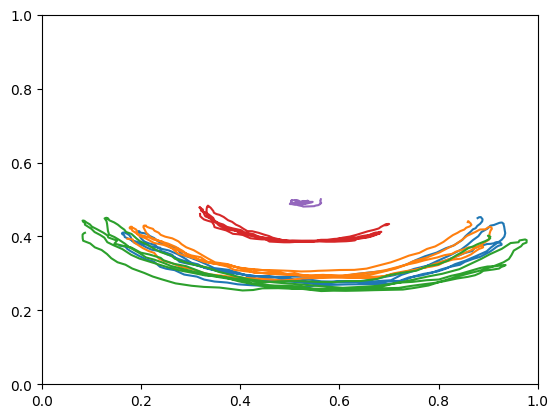

In [5]:
for point in coordinates_to_track:
    plt.plot(
        np.array(coordinates_to_track[point]['x'][1:]),
        1 - np.array(coordinates_to_track[point]['y'][1:])
    )
plt.axis([0, 1, 0, 1])
plt.show()